In [6]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
from dataPath import DATA_PATH
%matplotlib inline

import matplotlib
matplotlib.rcParams['figure.figsize'] = (6,6)
matplotlib.rcParams['image.cmap'] = 'gray'

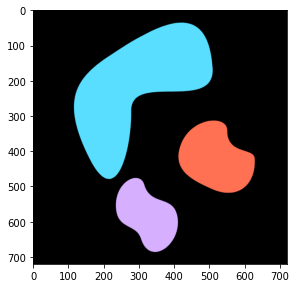

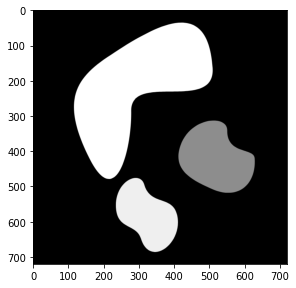

In [5]:
img = cv.imread(DATA_PATH+"images/amobea.png")
imgGray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)

plt.subplot(121);plt.imshow(img);plt.show()
plt.subplot(122);plt.imshow(imgGray);plt.show()

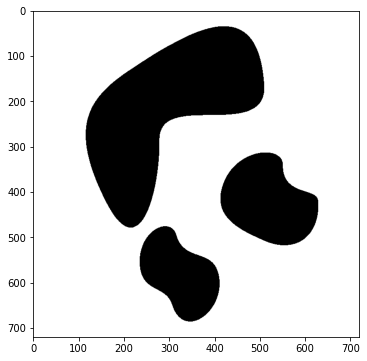

In [11]:
retval, dst = cv.threshold(imgGray,100,255,cv.THRESH_BINARY_INV)
plt.imshow(dst)

Numbers of contours found = 3


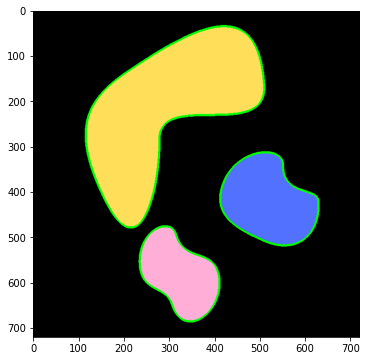

In [20]:
contours, hierarchy = cv.findContours(imgGray, cv.RETR_LIST, cv.CHAIN_APPROX_SIMPLE)
print("Numbers of contours found = {}".format(len(contours)))

image = img.copy()
cv.drawContours(image, contours, -1, (0, 255, 0), 3)
plt.imshow(image[..., ::-1])


In [25]:
def displayConnectedComponents(im):
    imLabels = im
    # The following line finds the min and max pixel values
    # and their locations in an image.
    (minVal, maxVal, minLoc, maxLoc) = cv.minMaxLoc(imLabels)
    # Normalize the image so the min value is 0 and max value is 255.
    imLabels = 255 * (imLabels - minVal) / (maxVal - minVal)
    # Convert image to 8-bits unsigned type
    imLabels = np.uint8(imLabels)
    # Apply a color map
    imColorMap = cv.applyColorMap(imLabels, cv.COLORMAP_JET)
    # Display colormapped labels
    plt.imshow(imColorMap[:, :, ::-1])

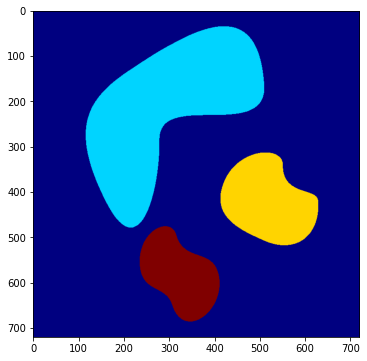

In [27]:
th, imThresh = cv.threshold(dst, 127, 255, cv.THRESH_BINARY_INV)
_, imLabels = cv.connectedComponents(imThresh)
displayConnectedComponents(imLabels)